In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [74]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [75]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

Linear Regression

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-37.131807467699204


Ridge Regression

In [132]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha' : [1e-15, 1e-10, 1e-5, 1, 5, 8, 10, 20, 30, 35, 40, 45, 50, 55, 75, 100, 150, 155, 160, 175, 200]}
rr = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
rr.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 1, 5, 8, 10, 20, 30, 35,
                                   40, 45, 50, 55, 75, 100, 150, 155, 160, 175,
                                   200]},
             scoring='neg_mean_squared_error')

In [133]:
print(rr.best_params_)
print(rr.best_score_)

{'alpha': 150}
-29.753617234142702


Lasso Regression

In [134]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha' : [1e-15, 1e-10, 1e-5, 1, 5, 8, 10, 20, 30, 35, 40, 45, 50, 55, 75, 100, 150, 155, 160, 175, 200]}
ll = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
ll.fit(X,y)

c:\Users\shann\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.887e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\shann\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.040e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\shann\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 1, 5, 8, 10, 20, 30, 35,
                                   40, 45, 50, 55, 75, 100, 150, 155, 160, 175,
                                   200]},
             scoring='neg_mean_squared_error')

In [135]:
print(ll.best_params_)
print(ll.best_score_)

{'alpha': 1}
-35.531580220694856


In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
prediction_ridge = rr.predict(X_test)
prediction_lasso = ll.predict(X_test)

C:\Users\shann\AppData\Local\Temp\ipykernel_20620\593838840.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - prediction_ridge)


<Axes: xlabel='MEDV', ylabel='Density'>

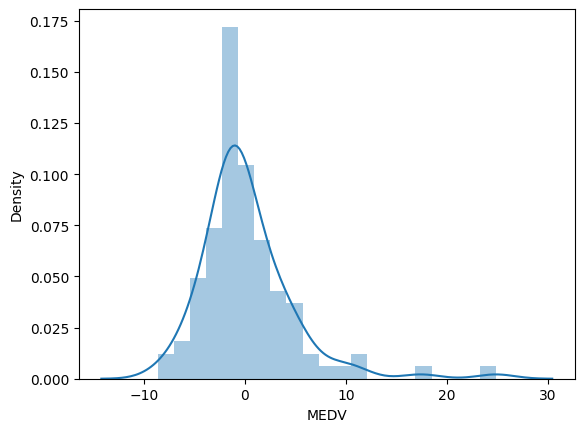

In [138]:
sns.distplot(y_test - prediction_ridge)

C:\Users\shann\AppData\Local\Temp\ipykernel_20620\3433148932.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - prediction_lasso)


<Axes: xlabel='MEDV', ylabel='Density'>

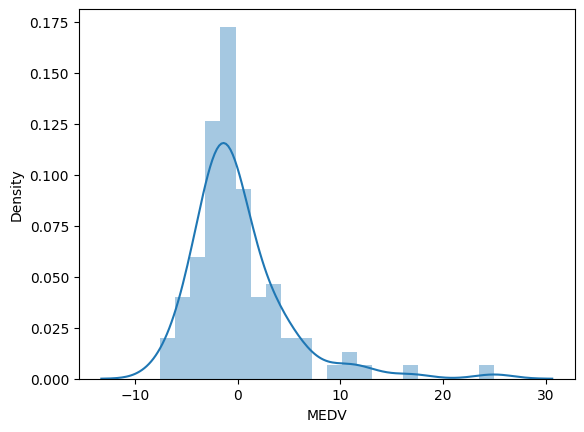

In [139]:
sns.distplot(y_test - prediction_lasso)